In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
cv.__version__

'4.6.0'

In [7]:

# # Read input image
# img = cv.imread("test_image/front_1.jpg", cv.IMREAD_GRAYSCALE)
# img = cv.resize(img, [400,400])

# # convert input image to grayscale
# # gray = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# # edges = cv.Canny(img,100,200)

# # read haarcascade for number plate detection
# cascade = cv.CascadeClassifier('haarcascades\haarcascade_russian_plate_number.xml')

# # Detect license number plates
# plates = cascade.detectMultiScale(img, 1.2, 5)
# print('Number of detected license plates:', len(plates))

# # loop over all plates
# for (x,y,w,h) in plates:
   
#    # draw bounding rectangle around the license number plate
#    cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
#    gray_plates = edges[y:y+h, x:x+w]
#    color_plates = img[y:y+h, x:x+w]
   
#    # save number plate detected
#    cv.imwrite('Numberplate.jpg', gray_plates)
#    cv.imshow('Number Plate', gray_plates)
#    cv.imshow('Number Plate Image', img)
#    cv.waitKey(0)
# cv.destroyAllWindows()


In [3]:
import cv2
from PIL import Image, ImageFilter

image = cv2.imread('My_dataset/test_img_raw/6.jpg') # hard [4 40 44 38(stuck) 27 23   ]
image = cv2.resize(image,[500,500])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5,5), 0)
blurred = cv2.GaussianBlur(blurred, (3,3), 0)

# blurred = cv2.GaussianBlur(blurred, (3,3), 0)
# blurred = cv2.GaussianBlur(blurred, (3,3), 0)
# blurred = cv2.GaussianBlur(blurred, (5,5), 0)
# blurred = cv2.GaussianBlur(blurred, (5,5), 0)
# blurred = cv2.GaussianBlur(blurred, (5,5), 0)
# blurred = cv2.GaussianBlur(blurred, (5,5), 0)

blur = cv2.GaussianBlur(gray, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)
# blur_2 = cv2.blur(gray,(5,5))

canny = cv2.Canny(blur, 60, 100)
# canny_2 = cv2.Canny(blur_2, 60, 100)
# cv.imshow('show',canny)
# cv2.waitKey(0)


# Find contours
cnts = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Iterate thorugh contours and draw rectangles around contours
print(f"num of box : {len(cnts)}")
count = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if (w>h) and (1.1<(w/h)<2.2) and (40<h<190):
        count += 1
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    # cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)

print(count)
cv2.imshow('canny', canny)
# cv2.imshow('canny_2', canny_2)

cv2.imshow('image', image)
cv2.imshow("blur",blurred)
cv2.waitKey(0)

num of box : 74
2


-1

In [4]:
from vision_function import local_plate
import cv2 as cv
coor,crop_img,img = local_plate(image_name='My_dataset/test_img_raw/1.jpg', input_form="PATH")

# pure_plate = crop_img[0]
# cv.imwrite("pure_plate_22.jpg", pure_plate)

In [9]:
cv.imshow("show",crop_img[0])
cv.waitKey(0)

-1

In [6]:
# from vistion_function import local_plate

In [1]:
import cv2 as cv
#get the number
# pure_plate = cv.imread("pure_plate.jpg")
# pure_plate = cv.imread("crop_real_1.jpg")
pure_plate = cv.imread("crop_real_1.jpg")



pure_plate_char = pure_plate[:int(pure_plate.shape[0]*0.65),:]
pure_plate_char_cut = pure_plate_char.copy() #pure_plate[:int(pure_plate.shape[0]*0.65),:]
threshold_char = pure_plate_char.shape[0]*0.45

pure_plate_province = pure_plate[int(pure_plate.shape[0]*0.65):,:]

# pure_plate = cv.resize(pure_plate,[600,400])
# blurred_pure_plate = cv.GaussianBlur(pure_plate_char, (5,5), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (5,5), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (3,3), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (3,3), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (3,3), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (3,3), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (3,3), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (3,3), 0)

blurred_pure_plate = cv.GaussianBlur(pure_plate_char, (0,0), sigmaX=2, sigmaY=2, borderType = cv.BORDER_DEFAULT)

canny_blurred_pure_plate = cv.Canny(blurred_pure_plate, 50, 100)
find_front = cv.findContours(canny_blurred_pure_plate, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
find_front = find_front[0] if len(find_front) == 2 else find_front[1]
count_pp = 0
keep_coor_raw = []
keep_coor = []
for i in find_front:
    x,y,w,h = cv.boundingRect(i)
    if (h>w)and(h>threshold_char)and((h/w)<5):
        if ((h/w)>3):
            w = w+3
            x = x-3
        w=w+3
        x=x-3
        h=h+3
        h=h-3
        count_pp += 1
        keep_coor_raw.append([x,y,w,h])
        # cv.rectangle(pure_plate_char, (x, y), (x + w, y + h), (36,255,12), 2)
keep_coor_raw.sort()
if (len(keep_coor_raw)>=1):
    keep_coor.append(keep_coor_raw[0])
    for i in range(len(keep_coor_raw)-1):
        i = i+1
        if ((keep_coor_raw[i][0]-keep_coor_raw[i-1][0]) < 7 ):  # if it close togather
            if (keep_coor_raw[i][2]>keep_coor_raw[i-1][2]):   # if it more wide
                keep_coor[i-1] = keep_coor_raw[i]
        else : keep_coor.append(keep_coor_raw[i])
for i in range(len(keep_coor)):
    cv.imwrite("crop_CP_test/"+str(i)+".jpg",pure_plate_char_cut[keep_coor[i][1]:keep_coor[i][1]+keep_coor[i][3],keep_coor[i][0]:keep_coor[i][0]+keep_coor[i][2]])
    cv.rectangle(pure_plate_char, (keep_coor[i][0], keep_coor[i][1]), (keep_coor[i][0] + keep_coor[i][2], keep_coor[i][1] + keep_coor[i][3]), (36,255,12), 2)
cv.imwrite("crop_CP_test/province.jpg",pure_plate_province)

cv.imshow("show_char",pure_plate_char)
cv.imshow("show_province",pure_plate_province)
cv.waitKey(0)

pure_plate.shape


(163, 301, 3)

In [3]:
keep = [0,1,2,3]
keep[0] = 1
keep

[1, 1, 2, 3]

In [5]:
import tensorflow as tf
import tensorflow.keras.layers as nn
mlpc = tf.keras.Sequential([
    # nn.Rescaling(scale=1./255, offset=0.0),
    nn.Conv2D(filters=32, kernel_size = (10,10), activation='relu', input_shape=(100, 200, 1)),
    nn.Conv2D(filters=16, kernel_size = (5,5), activation='relu'),
    nn.MaxPool2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None),
    nn.Flatten(),
    nn.Dense(30,activation='relu'),
    nn.Dense(10,activation="relu"),
    nn.Dense(1)
])
mlpc.load_weights("weight/clp/weight")
# new_model = tf.keras.models.load_model("correct_lisense_plate_model\savemodel")
# new_model = tf.keras.models.load_model('saved_model/my_model')


In [6]:
def process_img(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    tensor = tf.constant(gray/255)
    tensor = tf.reshape(tensor, (tensor.shape[0],tensor.shape[1],1), name=None)
    tensor = tf.image.resize(tensor,(100,200))
    tensor = tf.expand_dims(tensor,axis=0)
    return tensor


TensorShape([1, 100, 200, 1])

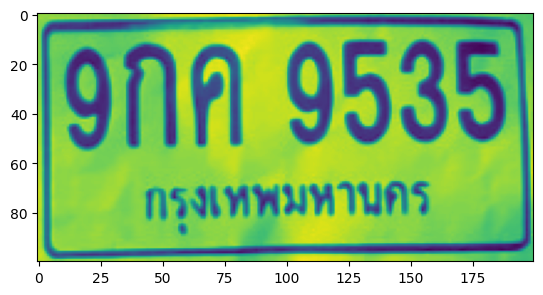

In [10]:
img = cv.imread("crop_real_3.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
tensor = tf.constant(gray/255)
tensor = tf.reshape(tensor, (tensor.shape[0],tensor.shape[1],1), name=None)
tensor = tf.image.resize(tensor,(100,200))
plt.imshow(tensor)
tensor = tf.expand_dims(tensor,axis=0)
tensor.shape

In [11]:
mlpc.predict(tensor)[0][0]

1/1 [==============================] - 0s 87ms/step


0.75269896

In [ ]:
# import cv2

# model_path = "savedmodel_lisense_plate/saved_model.pb"
# # config_path = "/path/to/model.pbtxt"  # Optional, if using a .pbtxt file

# net = cv2.dnn.readNetFromTensorflow(model_path, c)

In [ ]:
from vision_function import process_img


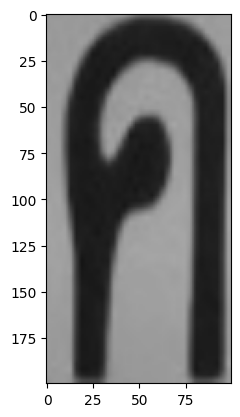

In [51]:
test_char = cv.imread("crop_CP_test/2.jpg")
test_char = cv2.resize(test_char, (100,200))
plt.imshow(test_char)

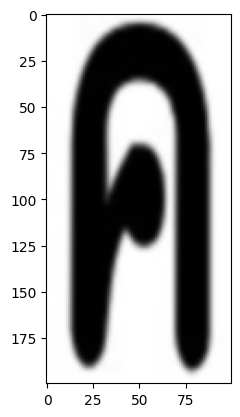

In [52]:
test_char = cv.imread("crop_CP_test/2w.jpg")
test_char = cv2.resize(test_char, (100,200))
test_char = cv.GaussianBlur(test_char, (5,5), 0)
test_char = cv.GaussianBlur(test_char, (3,3), 0)
plt.imshow(test_char)

In [1]:
from vision_function import *
keep_cut_char , pure_plate_province, keep_coor = local_CP(img = "crop_real_3.jpg")


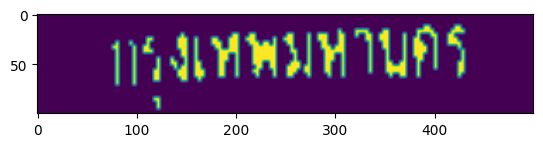

In [2]:
import matplotlib.pyplot as plt
plt.imshow(process_img(pure_plate_province,is_gray=True,Type='province')[0])

In [3]:
keep_cut_char[0].shape

(71, 32, 3)

In [4]:
import cv2
# cv2.imshow("tsss",keep_cut_char[0])
# cv2.waitKey(0)

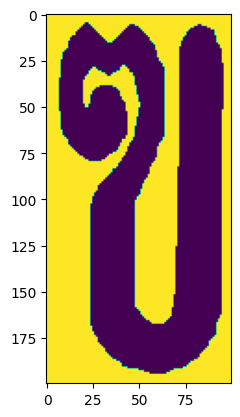

In [7]:
# plt.imshow(cv2.imread("My_dataset/Char/15/0.jpg"))
# test_char_tt =  process_img(cv2.imread("My_dataset/Char/12/0.jpg"),is_gray=True,Type='char')
# plt.imshow(test_char_tt[0])

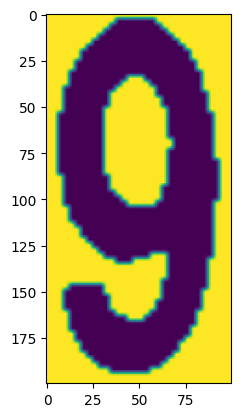

In [4]:
from vision_function import *
import matplotlib.pyplot as plt
# plt.imshow(cv2.imread("My_dataset/Char/15/0.jpg"))
plt.imshow(process_img(keep_cut_char[0],is_gray=True,Type='char')[0])
test_char =  process_img(keep_cut_char[0],is_gray=True,Type='char')
# test_char =  process_img(cv2.imread("My_dataset/Char/15/0.jpg"),is_gray=True,Type='char')


In [5]:
test_char.shape

TensorShape([1, 200, 100, 1])

In [6]:
# print()

In [7]:
from vision_function import *
rc = get_model_mrc()
result = rc(test_char)

In [8]:
number = tf.math.argmax(result[0])

In [9]:
number

<tf.Tensor: shape=(), dtype=int64, numpy=54>

In [10]:
index = ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '6', '7', '8', '9']
to_char = [ '0','1','2','3','4','5','6','7','8','9','ก', 'ข', 'ฃ', 'ค', 'ฅ', 'ฆ', 'ง', 'จ', 'ฉ', 'ช',
    'ซ', 'ฌ', 'ญ', 'ฎ', 'ฏ', 'ฐ', 'ฑ', 'ฒ', 'ณ', 'ด',
    'ต', 'ถ', 'ท', 'ธ', 'น', 'บ', 'ป', 'ผ', 'ฝ', 'พ',
    'ฟ', 'ภ', 'ม', 'ย', 'ร', 'ล', 'ว', 'ศ', 'ษ', 'ส',
    'ห', 'ฬ', 'อ', 'ฮ','none']

In [11]:
len(to_char),len(index)

(55, 55)

In [12]:
to_char[int(index[number])]

'9'

In [13]:
result[0]

<tf.Tensor: shape=(55,), dtype=float32, numpy=
array([8.5273456e-08, 7.8495850e-09, 8.0901111e-07, 5.3425530e-05,
       1.1284349e-06, 4.0442629e-07, 4.4241303e-12, 1.2647744e-08,
       2.9551518e-07, 1.4406910e-06, 5.1878626e-09, 4.2728716e-11,
       2.7562805e-07, 1.5515158e-07, 2.3829507e-08, 9.8787800e-10,
       3.3957922e-06, 3.0289883e-08, 9.5396324e-08, 4.1815152e-08,
       1.9482171e-14, 1.0785600e-07, 2.3332703e-12, 1.2761199e-06,
       6.0676629e-14, 1.7861849e-08, 2.5534796e-10, 8.8230339e-09,
       1.0560558e-11, 3.5245233e-07, 1.9121946e-06, 1.3423211e-06,
       8.4808383e-09, 1.6135469e-13, 1.4046517e-10, 1.2220977e-07,
       7.4258004e-09, 9.4957011e-12, 1.2228666e-06, 1.7460339e-07,
       5.4343580e-08, 1.1686642e-07, 8.6639428e-12, 2.5459055e-08,
       3.9698028e-10, 2.7709646e-08, 4.5630902e-11, 2.1716275e-11,
       3.0857771e-06, 6.7620292e-09, 2.7387537e-09, 1.2781634e-08,
       6.2115640e-07, 5.7915894e-08, 9.9992776e-01], dtype=float32)>

In [6]:
from vision_function import *
rc = get_model_mrc()
keep_cut_char , pure_plate_province = local_CP(img = "crop_real_3.jpg")
result = read_plate(keep_cut_char,"none",rc)
result


'9กค9ฃ35'

In [2]:
result

'9กฅ9535'

In [1]:
from vision_function import *
keep_cut_char , pure_plate_province, keep_coor = local_CP(img = "crop_real_3.jpg")


In [2]:
test_model_rp = get_model_mpc()


In [3]:
# img_test_province = cv2.imread("My_dataset/Province/0/0.jpg")
img_test_province = cv2.imread("province_looklike.jpg")

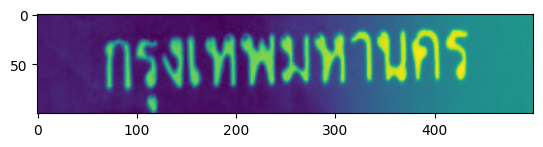

In [4]:
import matplotlib.pyplot as plt
plt.imshow(process_img(img_test_province,is_gray=True,Type='province')[0])

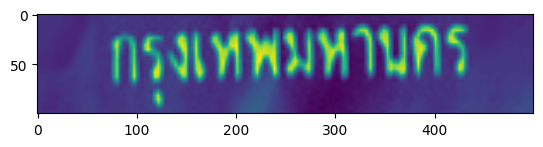

In [5]:
import matplotlib.pyplot as plt
plt.imshow(process_img(pure_plate_province,is_gray=True,Type='province')[0])

In [8]:
# result_province = test_model_rp(process_img(pure_plate_province,is_gray=True,Type='province'))
result_province = test_model_rp(process_img(img_test_province,is_gray=True,Type='province'))

In [9]:
result_province

<tf.Tensor: shape=(1, 78), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],
      dtype=float32)>

In [10]:
import tensorflow as tf
number = tf.argmax(result_province[0])

In [11]:
index_char = ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23',
            '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
            '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54',
            '6', '7', '8', '9']
to_char = [ '0','1','2','3','4','5','6','7','8','9','ก', 'ข', 'ฃ', 'ค', 'ฅ', 'ฆ', 'ง', 'จ', 'ฉ', 'ช',
    'ซ', 'ฌ', 'ญ', 'ฎ', 'ฏ', 'ฐ', 'ฑ', 'ฒ', 'ณ', 'ด',
    'ต', 'ถ', 'ท', 'ธ', 'น', 'บ', 'ป', 'ผ', 'ฝ', 'พ',
    'ฟ', 'ภ', 'ม', 'ย', 'ร', 'ล', 'ว', 'ศ', 'ษ', 'ส',
    'ห', 'ฬ', 'อ', 'ฮ','none']
index_province = ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23',
                '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
                '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54',
                '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7',
                '70', '71', '72', '73', '74', '75', '76', '77', '8', '9']
to_province = ['กรุงเทพมหานคร', 'อำนาจเจริญ', 'อ่างทอง', 'บึงกาฬ', 'บุรีรัมย์', 'ฉะเชิงเทรา', 'ชัยนาท', 'ชัยภูมิ', 'จันทบุรี', 'เชียงใหม่', 'เชียงราย', 'ชลบุรี', 'ชุมพร', 'กาฬสินธุ์', 'กำแพงเพชร', 'กาญจนบุรี', 'ขอนแก่น',
                'กระบี่', 'ลำปาง', 'ลำพูน', 'เลย', 'ลพบุรี', 'แม่ฮ่องสอน', 'มหาสารคาม', 'มุกดาหาร', 'นครนายก', 'นครปฐม', 'นครพนม', 'นครราชสีมา', 'นครสวรรค์', 'นครศรีธรรมราช', 'น่าน', 'นราธิวาส', 'หนองบัวลำภู',
                'หนองคาย', 'นนทบุรี', 'ปทุมธานี', 'ปัตตานี', 'พังงา', 'พัทลุง', 'พะเยา', 'เพชรบูรณ์', 'เพชรบุรี', 'พิจิตร', 'พิษณุโลก', 'พระนครศรีอยุธยา', 'แพร่', 'ภูเก็ต', 'ปราจีนบุรี', 'ประจวบคีรีขันธ์', 'ระนอง',
                'ราชบุรี', 'ระยอง', 'ร้อยเอ็ด', 'สระแก้ว', 'สกลนคร', 'สมุทรปราการ', 'สมุทรสาคร', 'สมุทรสงคราม', 'สระบุรี', 'สตูล', 'สิงห์บุรี', 'ศรีสะเกษ', 'สงขลา', 'สุโขทัย', 'สุพรรณบุรี', 'สุราษฎร์ธานี', 'สุรินทร์',
                'ตาก', 'ตรัง', 'ตราด', 'อุบลราชธานี', 'อุดรธานี', 'อุทัยธานี', 'อุตรดิตถ์', 'ยะลา', 'ยโสธร', 'none']

In [12]:
index_province[number],number

('77', <tf.Tensor: shape=(), dtype=int64, numpy=75>)

In [13]:
to_province[int(index_province[number])]

'none'